# **Transformations**



In [10]:
!pip install opencv-python


**Arithmetic operations**

**Exercise 1:** Complete TODO tags

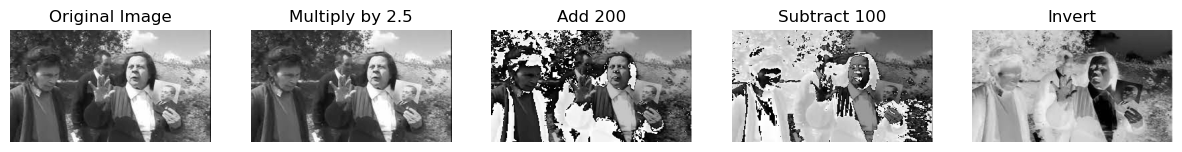

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Perform arithmetic transformations
# Multiply all pixel values by 2.5
transformed_multiply = img * 2.5

# Add a constant value (200) to all pixel values
transformed_add = img + 200

# Subtract a constant value (100) from all pixel values
transformed_subtract = img - 100

# Invert the pixel values
transformed_invert = 255 - img

# Display the original and transformed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(transformed_multiply, cmap='gray')
plt.title('Multiply by 2.5')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(transformed_add, cmap='gray')
plt.title('Add 200')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(transformed_subtract, cmap='gray')
plt.title('Subtract 100')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(transformed_invert, cmap='gray')
plt.title('Invert')
plt.axis('off')

plt.show()


**Binary Thresholding**

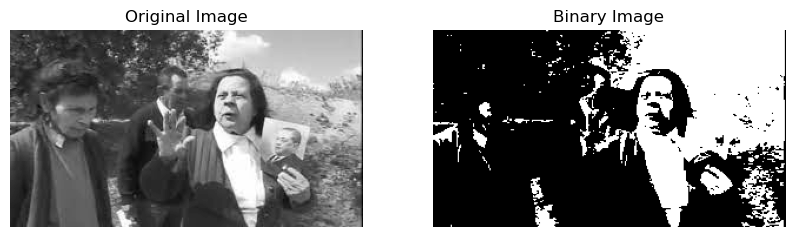

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Set a threshold value (e.g., 128)
threshold_value = 128

# Apply binary thresholding
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and binary images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()


**Exercise 2:** Haz un programa llamado ecualizar.py que realice una ecualización de histograma, como el que hace la función equalizeHist de OpenCV, pero de forma manual.

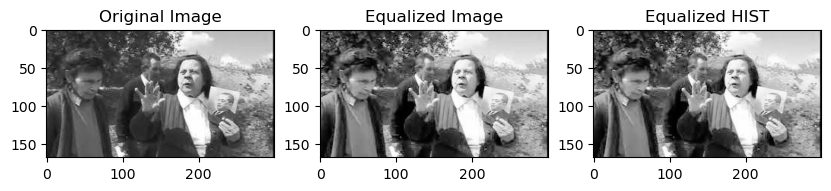

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def manual_histogram_equalization(img):
    # Compute the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF in the range [0, 255]
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Interpolate the new pixel values using the normalized CDF
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    img_equalized = img_equalized.reshape(img.shape)

    # Scale the pixel values to the range [0, 255]
    img_equalized = ((img_equalized - img_equalized.min()) /
                     (img_equalized.max() - img_equalized.min()) * 255).astype(np.uint8)

    return img_equalized

img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Perform manual histogram equalization
equalized_img = manual_histogram_equalization(img)

# Using equalizeHist
equalized_hist = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.subplot(1, 3, 3)
plt.imshow(equalized_hist, cmap='gray')
plt.title('Equalized HIST')

plt.show()


# **Global Transformations**

**Fourier transform**

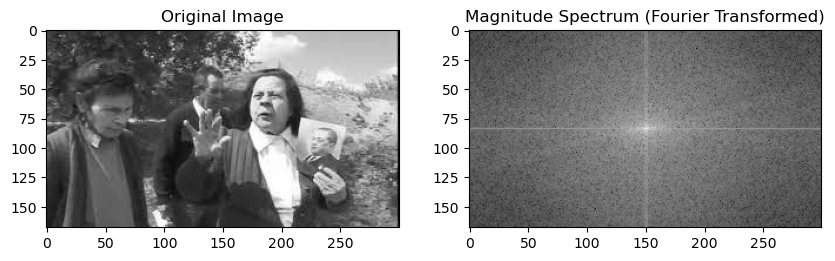

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace with your image)
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Apply 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Display the original and Fourier Transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transformed)')

plt.show()


# **Afffine Transformations**

**Translation**

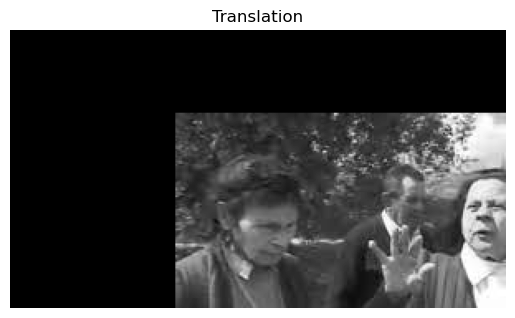

In [15]:
import cv2 as cv
import numpy as np

img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)

# Translation values
tx = 100
ty = 50

# Define the matrix
M = np.float32([[1, 0, tx],
                [0, 1, ty]])

# The flags parameter can be omitted; by default, it is INTER_LINEAR
rows, cols = img.shape
dst = cv.warpAffine(img, M, (cols, rows), flags=cv.INTER_CUBIC)

#Show the translation
plt.imshow(dst, cmap='gray')
plt.title('Translation')
plt.axis('off')

plt.show()

**Rotation**

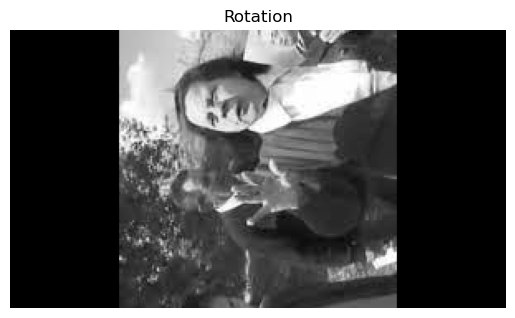

In [16]:
rows, cols = img.shape
# Get the rotation matrix with 90 degrees using the center of the image as a reference
M = cv.getRotationMatrix2D((cols/2, rows/2), 90, 1)  # The last parameter (1) is the scale
dst = cv.warpAffine(img, M, (cols, rows))

#Show the rotation
plt.imshow(dst, cmap='gray')
plt.title('Rotation')
plt.axis('off')

plt.show()

**Reflection**

Text(0.5, 1.0, 'Flipped Both')

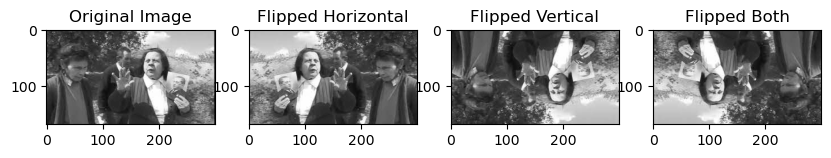

In [17]:
import cv2
import numpy as np

# Load an image (replace with your image)
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)

# Flip the image horizontally
flipped_horizontal = cv2.flip(image, 1)

# Flip the image vertically
flipped_vertical = cv2.flip(image, 0)

# Flip the image both horizontally and vertically
flipped_both = cv2.flip(image, -1)

# Display the original and flipped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(flipped_horizontal, cmap='gray')
plt.title('Flipped Horizontal')

plt.subplot(1, 4, 3)
plt.imshow(flipped_vertical, cmap='gray')
plt.title('Flipped Vertical')

plt.subplot(1, 4, 4)
plt.imshow(flipped_both, cmap='gray')
plt.title('Flipped Both')


**Scaling**

Text(0.5, 1.0, 'Scaled Image')

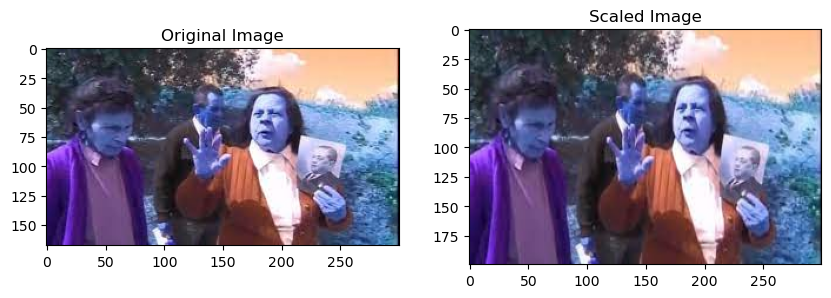

In [18]:
import cv2

# Load an image (replace with your image)
image = cv2.imread('lena.jpg')

# Specify the new dimensions (width, height)
new_width = 300
new_height = 200

# Resize the image using cv2.resize()
scaled_image = cv2.resize(image, (new_width, new_height))

# Display the original and scaled images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image')


# Projective Transformations

Text(0.5, 1.0, 'Transformed Image')

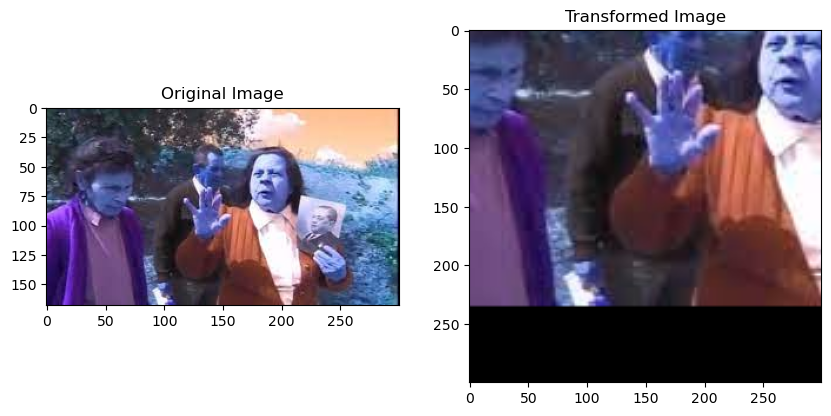

In [19]:
import cv2
import numpy as np

# Load an image (replace with your image)
image = cv2.imread('lena.jpg')

# Define four source points (coordinates of a rectangle in the original image)
src_pts = np.array([[50, 50], [200, 50], [50, 200], [200, 200]], dtype=np.float32)

# Define four destination points (where the corners of the rectangle should be mapped)
dst_pts = np.array([[0, 0], [300, 0], [0, 300], [300, 300]], dtype=np.float32)

# Calculate the perspective transformation matrix M
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Apply the perspective transformation using cv2.warpPerspective()
transformed_image = cv2.warpPerspective(image, M, (300, 300))

# Display the original and scaled images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')


**Exercise 3**: Apply different transformations to obtain the result 'lenaTransform'

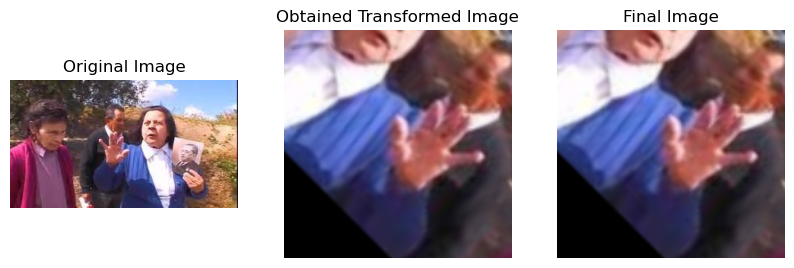

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (replace with your image)
image = cv2.imread('lena.jpg')
imageFinal = cv2.imread('lenaTransform.png')
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Transformation 1: Translation
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Transformation 2: Rotation
angle = 45
rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Transformation 3: Reflection
image = cv2.flip(image, 1)

# Transformation 4: Scaling
scale_factor = 1.5
image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Transformation 5: Projective Transformation
src_pts = np.array([[50, 50], [200, 50], [50, 200], [200, 200]], dtype=np.float32)
dst_pts = np.array([[0, 0], [300, 0], [0, 300], [300, 300]], dtype=np.float32)
projective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
imageFinal = cv2.warpPerspective(image, projective_matrix, (300, 300))

# Display the final transformed image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imageFinal, cv2.COLOR_BGR2RGB))
plt.title('Obtained Transformed Image')
plt.axis('off')

# Display the original image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imageFinal, cv2.COLOR_BGR2RGB))
plt.title('Final Image')
plt.axis('off')

plt.show()


# Neighborhood-based Transformations

**Convolutional filters**

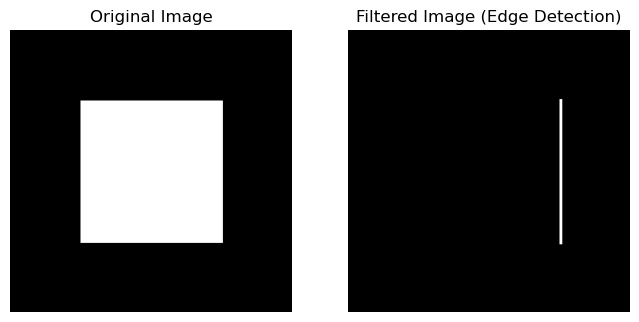

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create a sample image (replace image)
image = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(image, (50, 50), (150, 150), 255, -1)

# Define a simple 3x3 kernel for edge detection
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Apply the convolution filter
result = cv2.filter2D(image, -1, kernel)

# Display the original and filtered images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Filtered Image (Edge Detection)')
plt.axis('off')

plt.show()


**Median Filter**

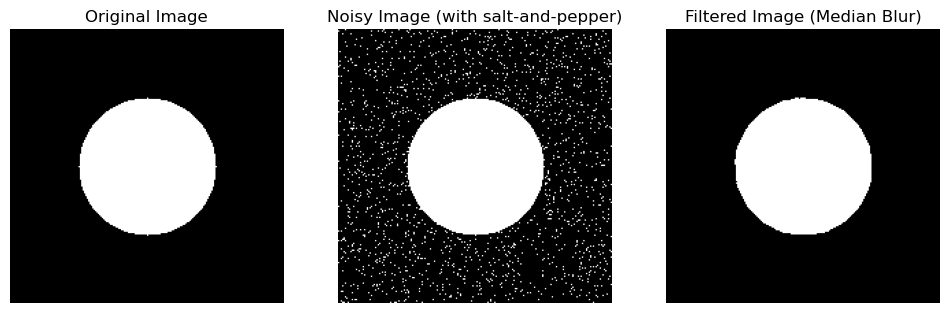

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create a sample image with salt-and-pepper noise
image = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(image, (100, 100), 50, 255, -1)
noise = np.random.choice([0, 255], size=(200, 200), p=[0.95, 0.05])
noise = noise.astype(np.uint8)  # Ensure the same data type as the image
image_with_noise = cv2.add(image, noise)

# Apply the median filter
result = cv2.medianBlur(image_with_noise, 5)  # 5x5 kernel

# Display the original, noisy, and filtered images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_with_noise, cmap='gray')
plt.title('Noisy Image (with salt-and-pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title('Filtered Image (Median Blur)')
plt.axis('off')

plt.show()


Exercise 4:

--2023-12-01 18:11:46--  https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png
Resolviendo upload.wikimedia.org (upload.wikimedia.org)... 185.15.58.240
Conectando con upload.wikimedia.org (upload.wikimedia.org)[185.15.58.240]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 226933 (222K) [image/png]
Grabando a: «input_image.png»

input_image.png     100%[===================>] 221,61K  --.-KB/s    en 0,09s   

2023-12-01 18:11:46 (2,47 MB/s) - «input_image.png» guardado [226933/226933]



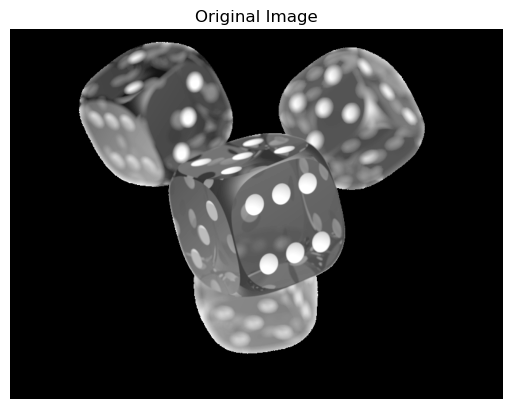

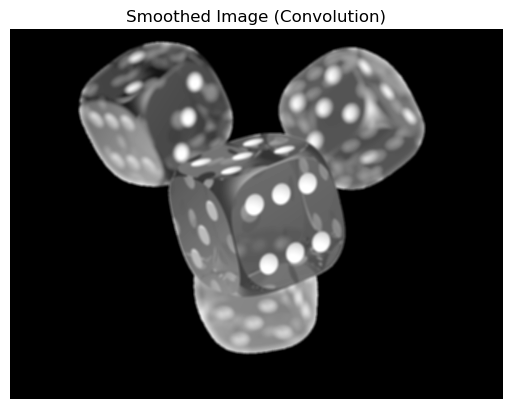

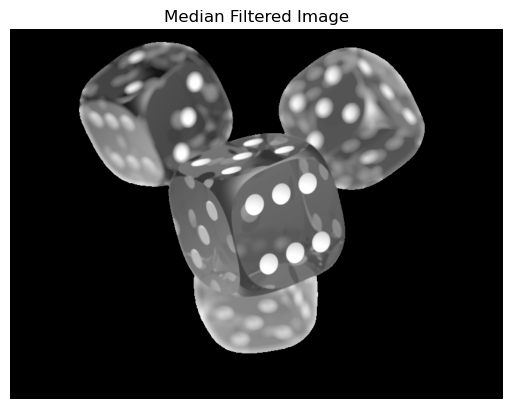

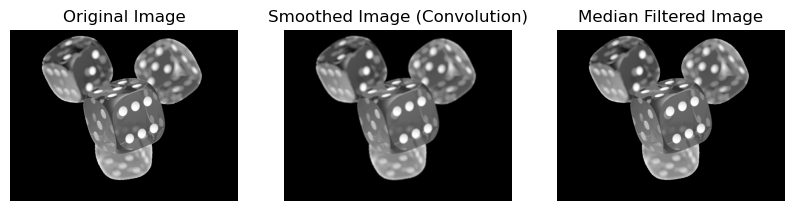

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Download an image from Internet
!wget https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png -O input_image.png

# Load the image
image = cv2.imread('input_image.png', cv2.IMREAD_GRAYSCALE)

# Show the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define a smoothed kernel
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# Applied the convolutional filter
smoothed_image = cv2.filter2D(image, -1, kernel)

# Show the image
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Convolution)')
plt.axis('off')
plt.show()

# Appy a median filter
median_filtered_image = cv2.medianBlur(image, 5)  # Kernel size: 5x5

# Show the filterd image
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

# Compare the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Convolution)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


# Morphological Transformations

**Erosion**

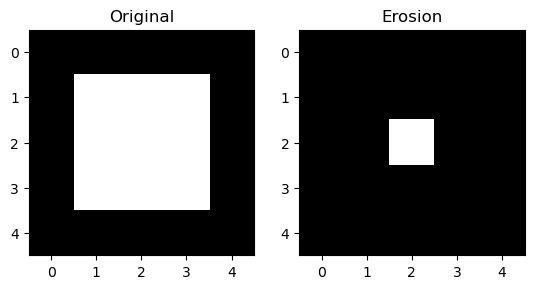

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create a sample binary image
image = np.array([[0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0]], dtype=np.uint8)

# Define a structuring element
kernel = np.ones((3, 3), np.uint8)

# Erode the image
erosion_result = cv2.erode(image, kernel, iterations=1)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(erosion_result, cmap='gray'), plt.title('Erosion')
plt.show()


**Dilation**

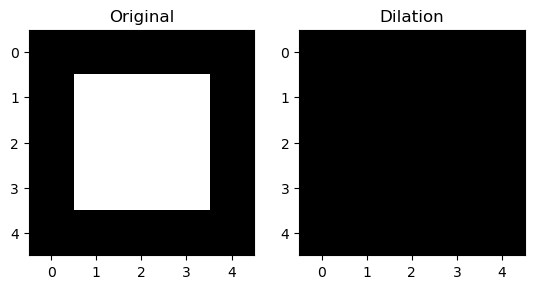

In [25]:
# Dilate the image
dilation_result = cv2.dilate(image, kernel, iterations=1)

# Display the results
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(dilation_result, cmap='gray'), plt.title('Dilation')
plt.show()


**Opening and Closing**

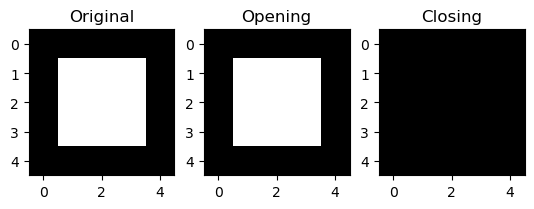

In [26]:
# Perform opening
opening_result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform closing
closing_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(opening_result, cmap='gray'), plt.title('Opening')
plt.subplot(133), plt.imshow(closing_result, cmap='gray'), plt.title('Closing')
plt.show()


**Top-Hat**

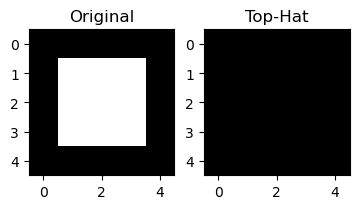

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Create a sample binary image
image = np.array([[0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0]], dtype=np.uint8)

# Define a structuring element
kernel = np.ones((3, 3), np.uint8)

# Apply top-hat transform
tophat_result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Display the results
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(tophat_result, cmap='gray'), plt.title('Top-Hat')
plt.show()


# Final exercise

Implement a code that loads the image damas.jpg, corrects the perspective of the board, and detects the white and red pieces.

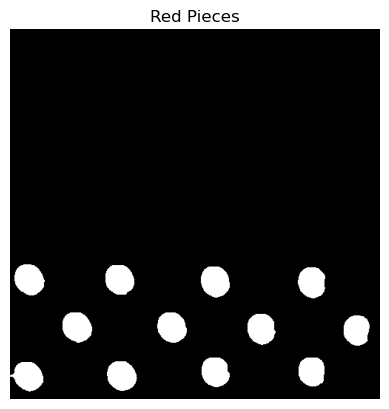

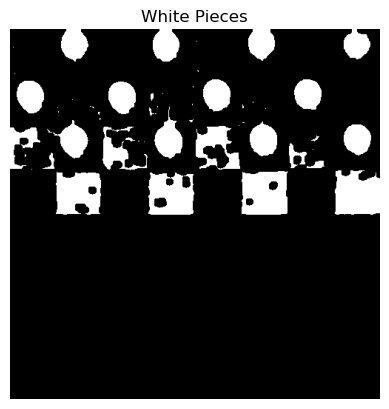

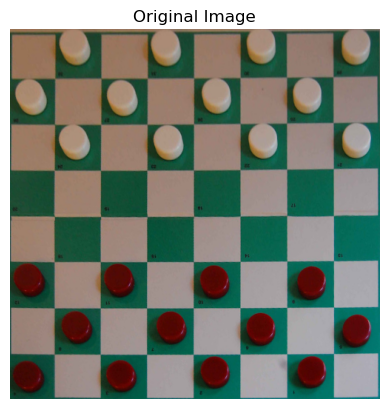

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('damas.jpg')

# Define the 4 points of the corners of the board
pts1 = np.float32([[278, 27], [910, 44], [27, 546], [921, 638]])
pts2 = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]])

# Apply perspective transformation
matrix = cv2.getPerspectiveTransform(pts1, pts2)
image = cv2.warpPerspective(image, matrix, (500, 500))

# Detect red pieces
lower_red = np.array([0, 0, 50])
upper_red = np.array([40, 30, 255])
mask_red = cv2.inRange(image, lower_red, upper_red)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
closing_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_red, cmap='gray')
plt.title('Red Pieces')
plt.axis('off')
plt.show()


# Load the image
image2 = cv2.imread('damas.jpg')

# Define the 4 points of the corners of the board
pts1 = np.float32([[278, 27], [910, 44], [27, 546], [921, 638]])
pts2 = np.float32([[0, 0], [500, 0], [0, 500], [500, 500]])

# Apply perspective transformation
matrix = cv2.getPerspectiveTransform(pts1, pts2)
image2 = cv2.warpPerspective(image2, matrix, (500, 500))

# Delete the lower half of the board
image[250:, :] = 0

# Detect white pieces
lower_white = np.array([0, 100, 160])
upper_white = np.array([255, 255, 255])
mask_white = cv2.inRange(image, lower_white, upper_white)
closing_white = cv2.morphologyEx(mask_white, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_white, cmap='gray')
plt.title('White Pieces')
plt.axis('off')
plt.show()

# Show the original image
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()
